In [1]:
# ランダムウォークの判定
# 拡張ディッキー・フラー検定
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as pdr
import numpy as np
end="2016/9/30"
lnn225 = np.log(pdr.DataReader("NIKKEI225",'fred',"1949/5/16",end)).dropna()

In [2]:
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[0]) # 検定統計量
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[1]) # p-値
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[2]) # ラグの数
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[3]) # データの数
print(sm.tsa.adfuller(lnn225.NIKKEI225,regression='nc')[4]) # 臨界値

2.1736968675693764
0.9941697311348714
38
16730
{'1%': -2.565873653125892, '5%': -1.941016067006822, '10%': -1.6168041340187047}


In [3]:
z=lnn225
y=z.diff().dropna()
x=z.shift(1).dropna()
model=sm.OLS(y,x)
results=model.fit()
print("without drift ",results.params[0])
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print("with drift ",results.params[0],results.params[1])
x["t"]=range(len(y))
model=sm.OLS(y,x)
results=model.fit()
print("with drift + trend ",results.params[0],results.params[1],results.params[2])

without drift  2.6403530127516935e-05
with drift  0.0015908985480093765 -0.00015656280339929363
with drift + trend  0.0015504621665949725 -0.00014917683976239596 -2.6066137091547477e-09


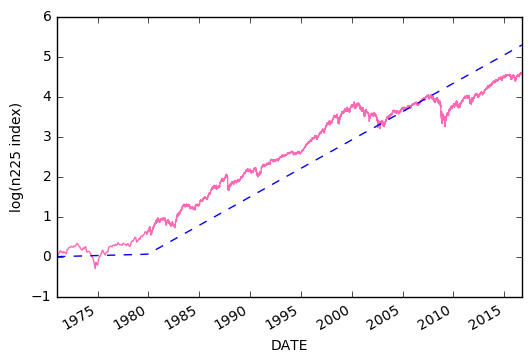

In [8]:
# かくｔ
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as pdr
import numpy as np
end="2016/9/30"
lnw5000 = np.log(pdr.DataReader("WILL5000INDFC",'fred',"1949/5/16",end)).dropna()
lnw5000.columns=['Close']
plt.plot(lnw5000.Close,color='hotpink')
lnw5000["t"]=range(len(lnw5000))
model=sm.OLS(lnw5000.Close,lnw5000.t)
results=model.fit()
results.fittedvalues.plot(label='prediction',style='--')
plt.ylabel('log(n225 index)')

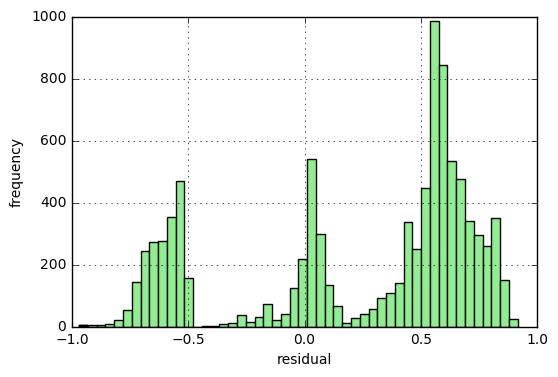

In [9]:
results.resid.hist(bins=50,color='lightgreen')
plt.ylabel('frequency')
plt.xlabel('residual')